# German Credit Data
> This dataset contains information about 1000 loan applications,<br>
 including personal and financial data, credit history, and loan characteristics.

## 1. Libraries
- ucimlrepo - Statlog German Credit Data
- numpy 
- pandas 
- matplotlib 
- seaborn 
- scikit-learn
- missingno - Missing values visualization 

In [27]:
# Run to install the necessary packages from the terminal
%pip install ucimlrepo pandas numpy matplotlib seaborn scikit-learn missingno

Note: you may need to restart the kernel to use updated packages.


## 2. Setup

In [28]:
# One run setup

### Importing libraries _______________________________________________________
# German Credit Data
from ucimlrepo import fetch_ucirepo

# Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

### Fetching dataframes _______________________________________________________
# Fetch from the UCIML Repository
german_credit = fetch_ucirepo(id=144)

df = german_credit.data.original
# convert object types into categorical
df[df.select_dtypes('object').columns] = df.select_dtypes('object').astype('category')
# rename the target column
df.rename(columns={'class': 'target'}, inplace=True)

# Features and target
X  = df.drop(columns='target')
y  = df['target']

In [29]:
# Original dataframe (features + target)
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## 3. The dataset
> There are 20 features and 1 target.<br>
> 1000 observations.

> The author provides a **table** and an [**additional description**](/Users/felipecampelo/dev/projects/german-credit/info/german-credit-additional-variable-information.md) for the variables.

In [30]:
# Author's table for a succint variables description
german_credit.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


## 4. Data Cleaning
### 4.1 Missing Values
> There are no missing/null values.<br>
> If present, they would appear as white strips. 

Text(0.5, 1.0, 'Missing values in the dataset')

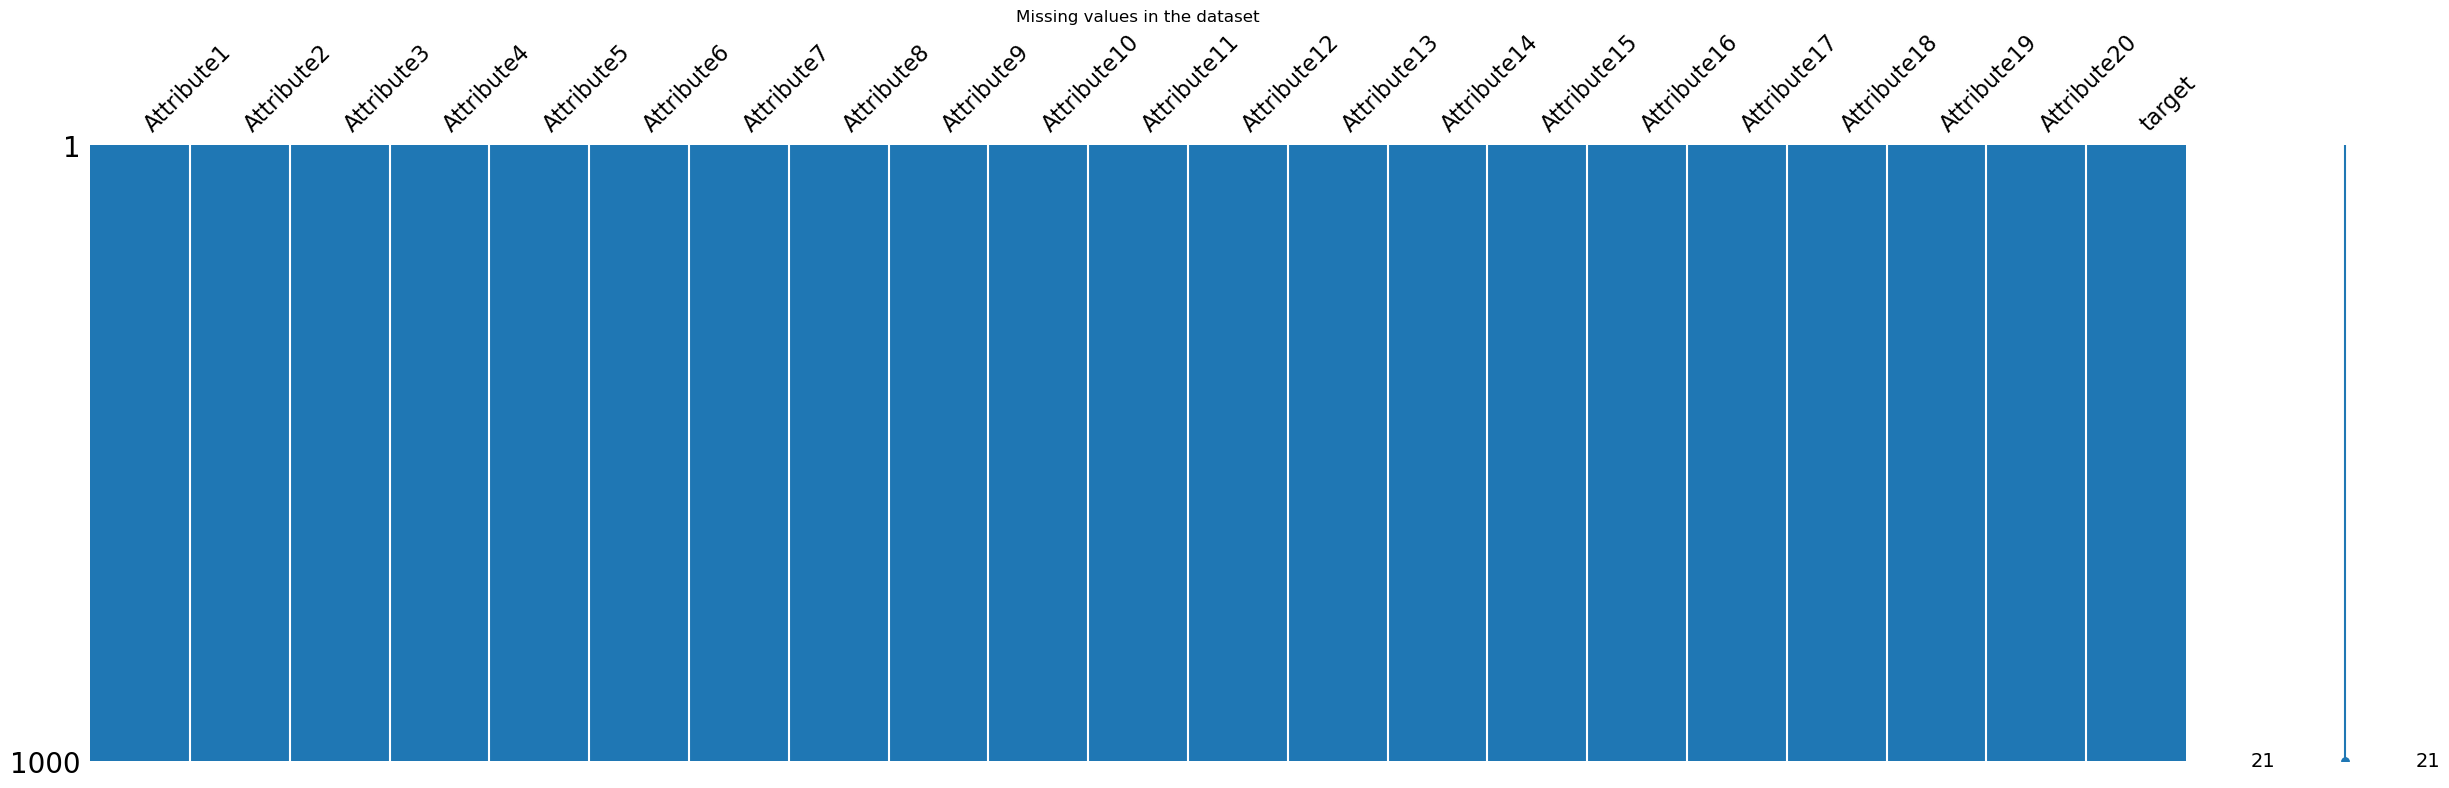

In [31]:
# MissingNO matrix
msno.matrix(df, figsize=(30, 8), color=sns.color_palette()[0])
plt.title('Missing values in the dataset')

### 4.2 Duplicates
> There are no duplicate rows.

Text(0.5, 1.0, 'Duplicate rows in the dataset')

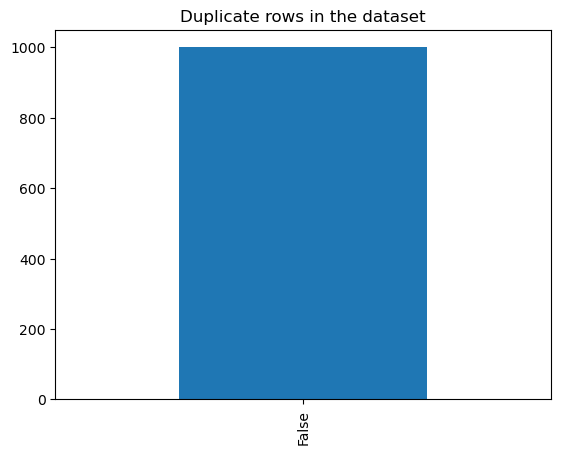

In [77]:
# Summary of duplicate rows 
df.duplicated().value_counts().plot(kind='bar')
plt.title('Duplicate rows in the dataset')

### 4.3 Distributions

Text(0.5, 0.98, 'Feature distributions')

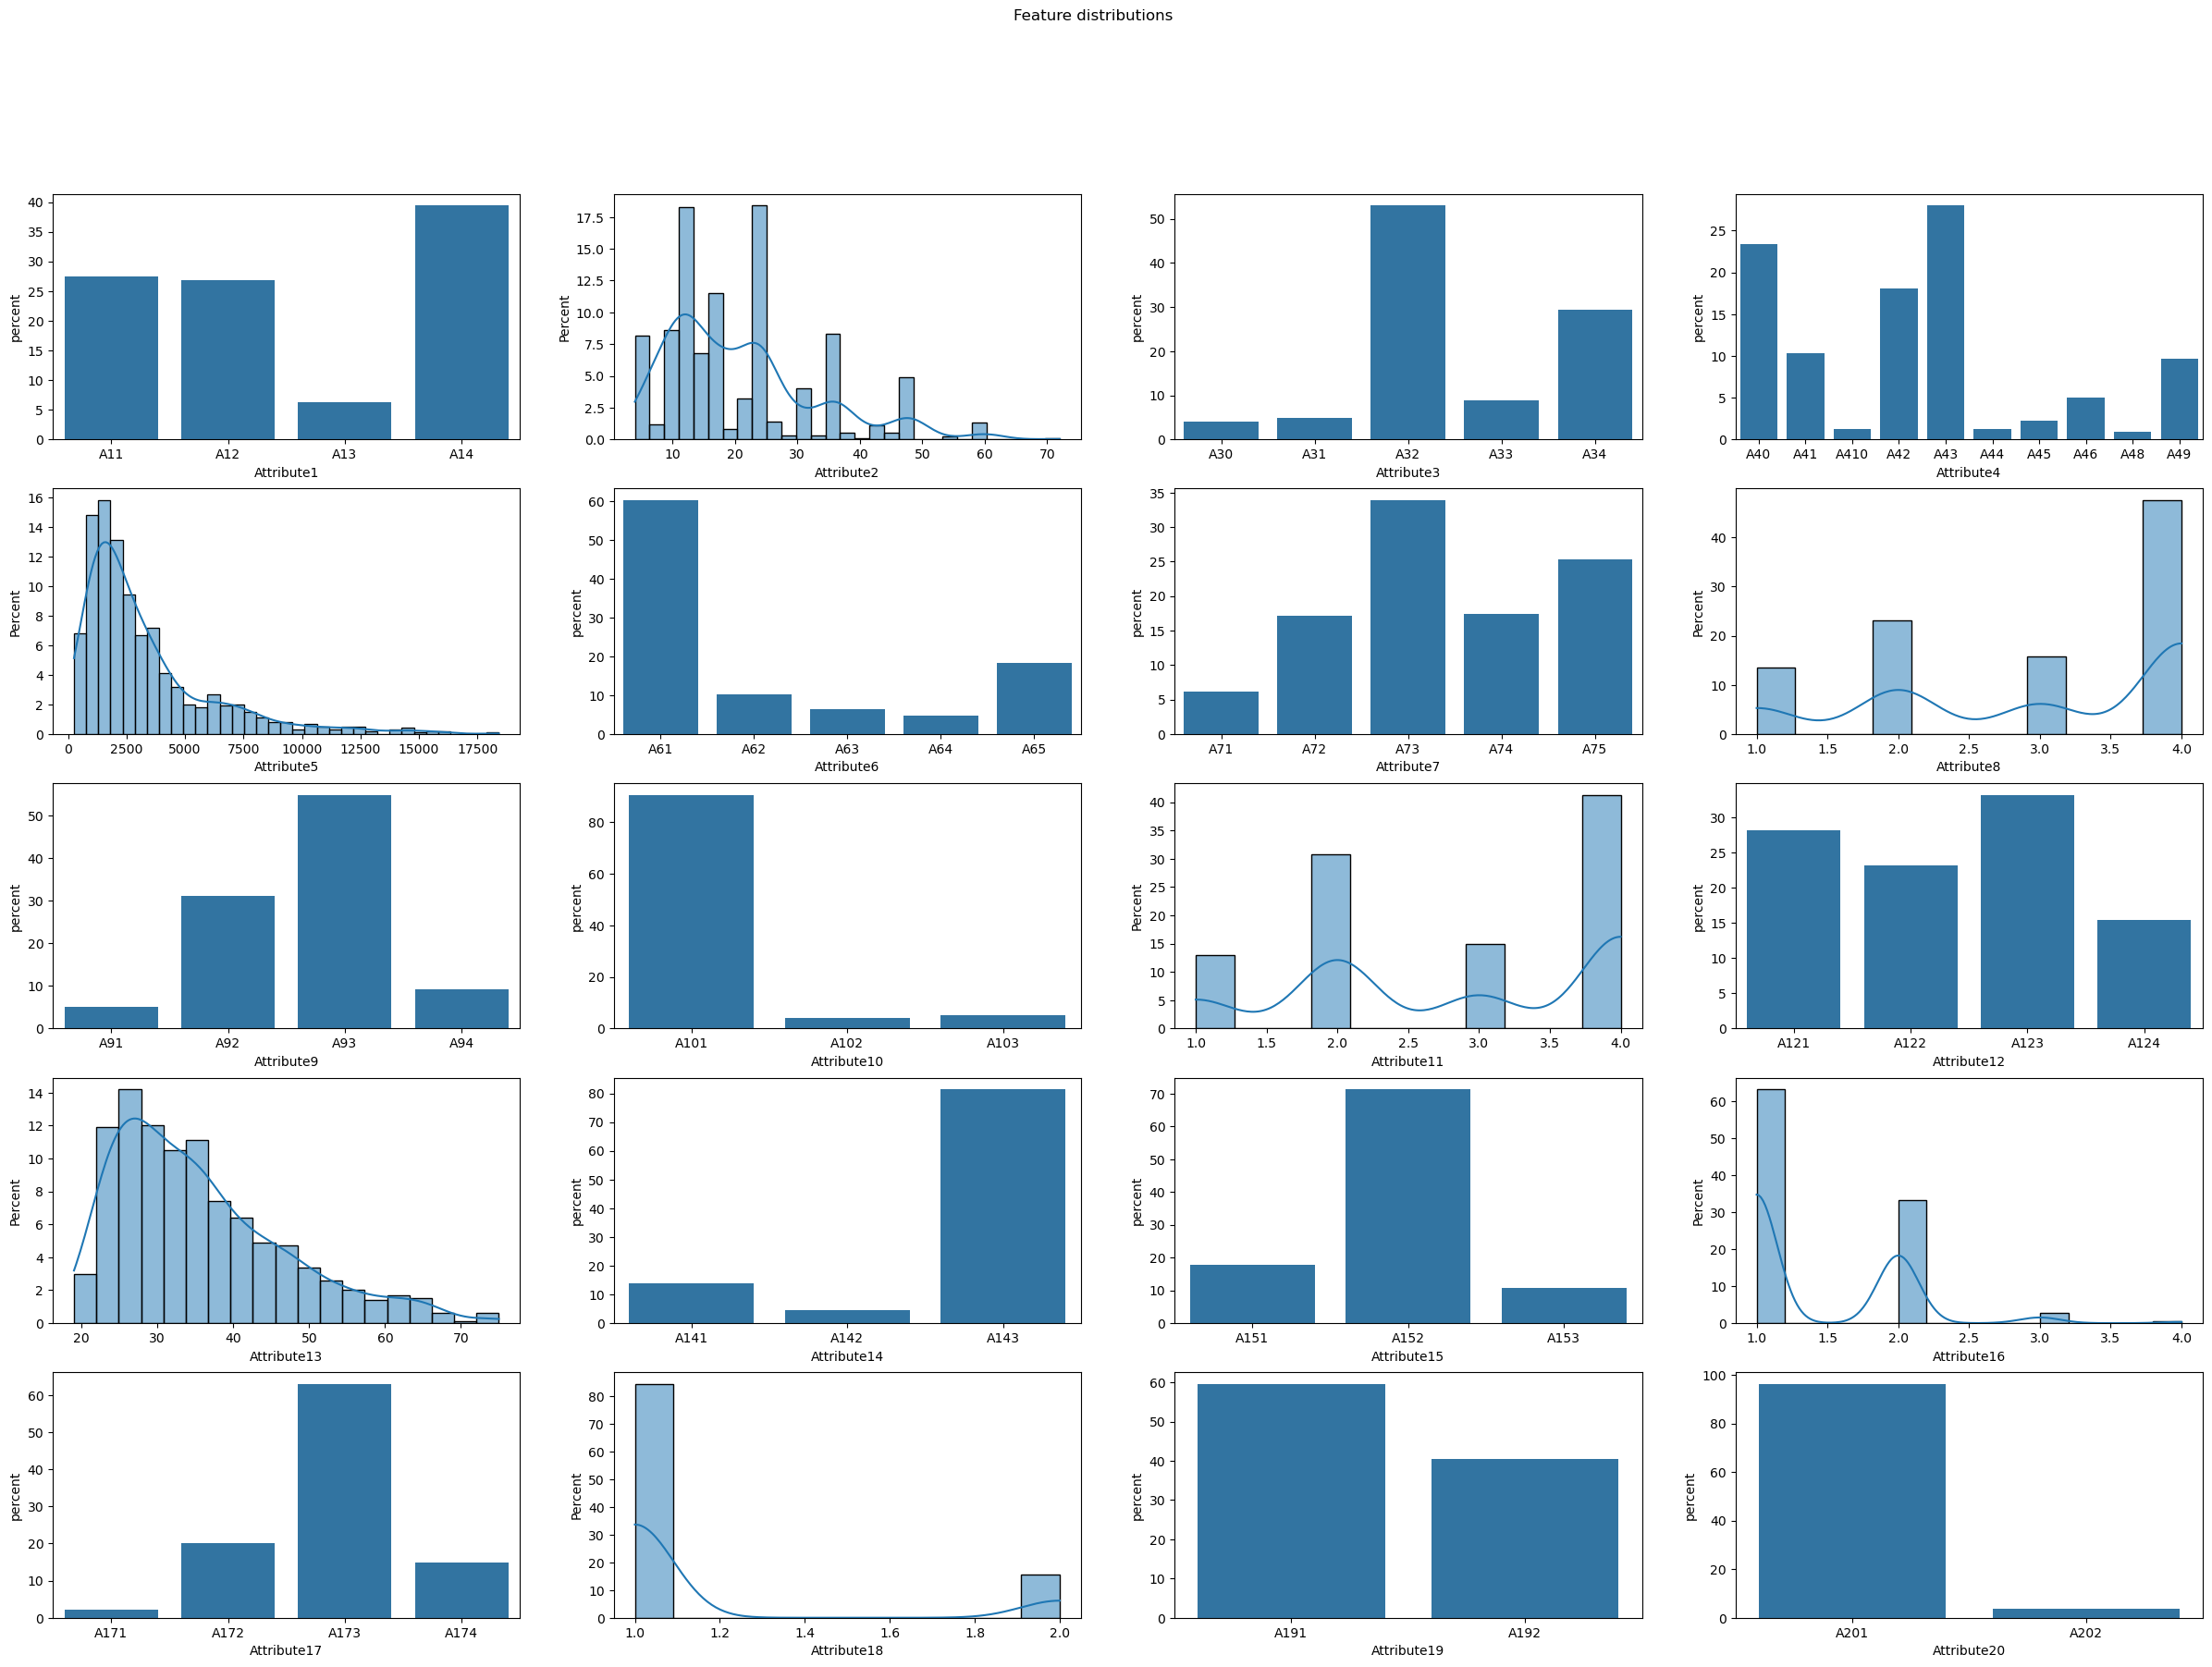

In [73]:
# TODO: A410 after A41 ?!
# Features distributions
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 20))
axes = axes.flatten()

for i, feat in enumerate(X.columns):
    if X[feat].dtype == 'int64':
        sns.histplot(X[feat], kde=True, stat='percent', ax=axes[i])
    else:
        sns.countplot(x=feat, data=X, stat='percent', ax=axes[i], order=sorted(X[feat].unique()))

plt.suptitle('Feature distributions')

Text(0.5, 1.0, 'Target distribution')

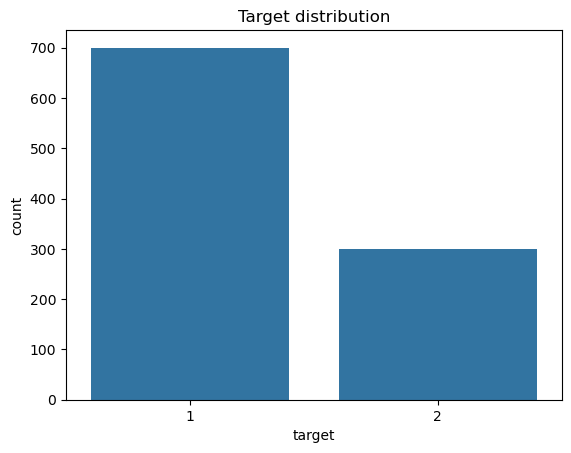

In [68]:
# TODO: binary scale the target and columns attribute19 and attribute20
# Target distribution
sns.countplot(y.to_frame(), x='target', order=sorted(y.unique()))
plt.title('Target distribution')